In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import re
pd.options.display.max_columns = 100
import datetime
import time

In [2]:
order_ori =pd.read_csv("order.csv")
order_ori.rename(columns={'Unnamed: 4':'is_returned'}, inplace=True)
order_ori.head(3)

,GUID,seller_GUID,seller_name,subtotal,(No column name),create_time,business_hour_guid,order_from_type,user_id,installment,mobile_pay_type
0,7358E8A1-A918-42CD-A846-AAEF0A0E2B67,35443723-B460-4CF5-AFD2-DF1F29ECB305,17P商品-HONEYWELL空氣循環機,2.0,1,2010-06-01 18:06:41.987,02C55598-E1E7-40E1-996B-371EAE55F840,1,1111229516,0,NaN
1,A248B260-6366-4A2D-9A29-BF29A170A4AB,35443723-B460-4CF5-AFD2-DF1F29ECB305,17P商品-HONEYWELL空氣循環機,1350.0,0,2010-06-07 15:34:49.693,02C55598-E1E7-40E1-996B-371EAE55F840,1,1111229574,0,NaN
2,8433DD4F-368D-41EA-9D3B-56E5BAE76BC2,35443723-B460-4CF5-AFD2-DF1F29ECB305,17P商品-HONEYWELL空氣循環機,1350.0,0,2010-06-07 22:28:37.443,02C55598-E1E7-40E1-996B-371EAE55F840,1,1111193708,0,NaN


In [3]:
deal=pd.read_csv("deal.csv")
deal=deal.reset_index()
deal.head(3)

C:\Users\yscys\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,index,business_hour_guid,seller_GUID,business_hour_order_time_s,business_hour_order_time_e,business_hour_deliver_time_s,business_hour_deliver_time_e,pic_alt zip_code,city_name,district_name,item_name,item_orig_price,item_price,item_default_daily_amount,event_name,event_title,product_spec,shopping_cart,combo_pack_count,quantity_multiplier,city_list,deal_acc_business_group_id,acc_business_group_name,deal_type,is_travel_deal,installment_3months,installment_6months,installment_12months,deny_installment,shippingdate,is_long_contract,develope_sales_id,operation_sales_id,slug,ordered_quantity,ordered_total,category_list,freight_amount,enable_isp,discount_price,is_wms,ancestor_business_hour_guid,code_name,code
0,29B37E53-021C-48E9-909E-C6C151974AC7,EC5DDAD4-F8F8-418B-8AED-7BAC2553F2B6,2000-03-01 00:00:00.000,2000-03-01 01:00:00.000,2000-03-01 00:00:00.000,2000-03-01 00:00:59.000,柯絲妃兒/胎盤素/肌因賦活/身體精華乳,407,台中市,西屯區,柯絲妃兒胎盤素肌因賦活身體精華乳10入,8800.0,1490.0,20,。,NaN,NaN,0,1,10.0,[477|492],7,宅配,84.0,0,1,0,0,0,0.0,0,1113531340,1.113531e+09,NaN,0,0.0,[88|221|124|769|136|139],0.0,0,NaN,0,NaN,美體私密,5821.0
1,2C6E83A9-9785-4593-A759-07A78AB309BB,B6CC8A1E-37C8-44E5-B6E2-15123387AF95,2001-01-01 00:00:00.000,2001-01-01 00:00:00.000,2001-01-01 00:00:00.000,2001-01-01 00:00:59.000,aibo 領導者/ 立體聲/智慧藍牙/耳機麥克風系列,243,新北市,泰山區,aibo領導者-立體聲智慧藍牙耳機麥克風系列（2入方案）,1580.0,798.0,20,|型號：F1300I/HM3600/HM9100/Q2。,NaN,NaN,1,2,2.0,[477|492],7,宅配,35.0,0,1,1,1,0,0.0,0,1112804144,1.112804e+09,NaN,0,0.0,[88|221|117|2179|2180|100105|100106|136|139],0.0,0,NaN,0,NaN,網路設備/穿戴裝置/辦公設備,222.0
2,08EF8DAA-7A9F-4DF4-ADBC-244F285F7C59,B6CC8A1E-37C8-44E5-B6E2-15123387AF95,2001-01-01 00:00:00.000,2001-01-01 00:00:00.000,2001-01-01 00:00:00.000,2001-01-01 00:00:59.000,aibo 領導者/ 立體聲/智慧藍牙/耳機麥克風系列,243,新北市,泰山區,aibo領導者-立體聲智慧藍牙耳機麥克風系列（4入方案）,3160.0,1499.0,20,|型號：F1300I/HM3600/HM9100/Q2。,NaN,NaN,1,4,4.0,[477|492],7,宅配,35.0,0,1,1,1,0,0.0,0,1112804144,1.112804e+09,NaN,0,0.0,[88|221|117|2179|2180|100105|100106|136|139],0.0,0,NaN,0,NaN,網路設備/穿戴裝置/辦公設備,222.0


In [4]:
deal.columns=['business_hour_guid', 'seller_GUID', 'business_hour_order_time_s',
       'business_hour_order_time_e', 'business_hour_deliver_time_s',
       'business_hour_deliver_time_e', 'pic_alt','zip_code', 'city_name',
       'district_name', 'item_name', 'item_orig_price', 'item_price',
       'item_default_daily_amount', 'event_name', 'event_title',
       'product_spec', 'shopping_cart', 'combo_pack_count',
       'quantity_multiplier', 'city_list', 'deal_acc_business_group_id',
       'acc_business_group_name', 'deal_type', 'is_travel_deal',
       'installment_3months', 'installment_6months', 'installment_12months',
       'deny_installment', 'shippingdate', 'is_long_contract',
       'develope_sales_id', 'operation_sales_id', 'slug', 'ordered_quantity',
       'ordered_total', 'category_list', 'freight_amount', 'enable_isp',
       'discount_price', 'is_wms', 'ancestor_business_hour_guid', 'code_name',
       'code']

In [5]:
dfOri=pd.merge(order_ori,deal,how='left',on=['business_hour_guid','seller_GUID'])

In [6]:
dfOri.to_csv('dfOri.csv',index=False)

### 將運送開始日期排序，找出有問題的欄位

In [7]:
dfOri=pd.read_csv("dfOri.csv")

C:\Users\yscys\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (15,24,25,50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
order_ori.head(5)

,GUID,seller_GUID,seller_name,subtotal,(No column name),create_time,business_hour_guid,order_from_type,user_id,installment,mobile_pay_type
0,7358E8A1-A918-42CD-A846-AAEF0A0E2B67,35443723-B460-4CF5-AFD2-DF1F29ECB305,17P商品-HONEYWELL空氣循環機,2.0,1,2010-06-01 18:06:41.987,02C55598-E1E7-40E1-996B-371EAE55F840,1,1111229516,0,NaN
1,A248B260-6366-4A2D-9A29-BF29A170A4AB,35443723-B460-4CF5-AFD2-DF1F29ECB305,17P商品-HONEYWELL空氣循環機,1350.0,0,2010-06-07 15:34:49.693,02C55598-E1E7-40E1-996B-371EAE55F840,1,1111229574,0,NaN
2,8433DD4F-368D-41EA-9D3B-56E5BAE76BC2,35443723-B460-4CF5-AFD2-DF1F29ECB305,17P商品-HONEYWELL空氣循環機,1350.0,0,2010-06-07 22:28:37.443,02C55598-E1E7-40E1-996B-371EAE55F840,1,1111193708,0,NaN
3,A85FC574-B5DA-43BE-88C8-326E1B90EE12,35443723-B460-4CF5-AFD2-DF1F29ECB305,17P商品-HONEYWELL空氣循環機,1350.0,0,2010-06-08 14:38:53.600,02C55598-E1E7-40E1-996B-371EAE55F840,1,1111250894,0,NaN
4,EB9E799B-EB28-4F9F-820F-FF54BBF9E81F,35443723-B460-4CF5-AFD2-DF1F29ECB305,17P商品-HONEYWELL空氣循環機,1350.0,0,2010-06-09 08:45:17.770,02C55598-E1E7-40E1-996B-371EAE55F840,1,1111386826,0,NaN


In [9]:
dfOri.business_hour_deliver_time_e.sort_values(ascending= False).head(3)

3079467    9999-12-31 00:00:00.000
3081700    9999-12-31 00:00:00.000
3474924    9999-05-18 00:00:59.000
Name: business_hour_deliver_time_e, dtype: object

In [10]:
df=dfOri.drop(index=[3079467,3081700,3474924])

### 重複值

In [11]:
dfOri.shape

(4087786, 53)

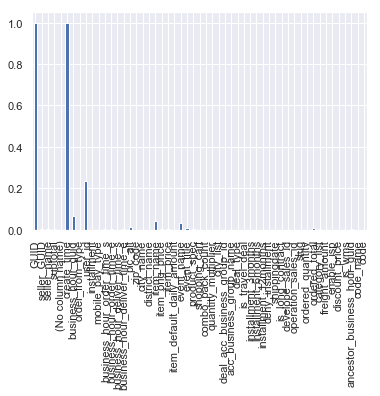

In [12]:
(dfOri.apply(lambda x:x.unique().shape[0],axis=0)/dfOri.shape[0]).plot(kind='bar')

### 遺漏值

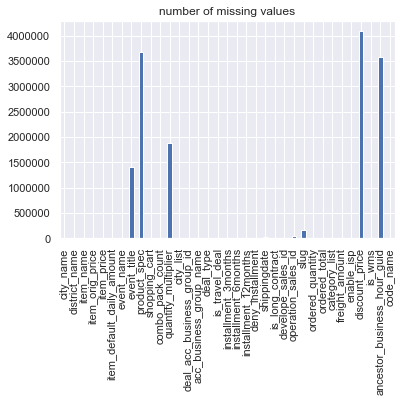

In [13]:
tempdfg=dfOri[['city_name',
       'district_name', 'item_name', 'item_orig_price', 'item_price',
       'item_default_daily_amount', 'event_name', 'event_title',
       'product_spec', 'shopping_cart', 'combo_pack_count',
       'quantity_multiplier', 'city_list', 'deal_acc_business_group_id',
       'acc_business_group_name', 'deal_type', 'is_travel_deal',
       'installment_3months', 'installment_6months', 'installment_12months',
       'deny_installment', 'shippingdate', 'is_long_contract',
       'develope_sales_id', 'operation_sales_id', 'slug', 'ordered_quantity',
       'ordered_total', 'category_list', 'freight_amount', 'enable_isp',
       'discount_price', 'is_wms', 'ancestor_business_hour_guid', 'code_name']]
tempdfg.isnull().sum().plot(kind='bar',title='number of missing values')

#### 目標變數：
* 該商品於未來7.14.30.60.180天的預估銷量：利用order訂單與business_hour_order_time_s時間相減進行計算，除以總銷量取得百分比(可先做)


### 將欄位轉換格式為datetime

In [14]:
import datetime

In [15]:
df=df.reset_index(drop=True)
df=df[:4080853]

In [16]:
for i in ['business_hour_order_time_s','create_time','business_hour_order_time_e','business_hour_deliver_time_s','business_hour_deliver_time_e']:
        df[i]=pd.to_datetime(df[i])
    

In [17]:
df['purchase_year']=df['create_time'].apply(lambda x:x.year)
df=df[df.purchase_year>=2015] #  挑選 2015年之後的交易紀錄

In [18]:
output = df[['business_hour_guid', 'subtotal','create_time', 'business_hour_order_time_s']] #選取需要的欄位
output.head(2)

,business_hour_guid,subtotal,create_time,business_hour_order_time_s
1954384,B744DFF8-0D8F-49E1-A6AA-536DBD4CCE8B,205.0,2015-01-01 00:00:15.960,2014-12-31 12:00:00
1954385,EFBA954B-B665-4FF1-B4ED-857B915FB840,1090.0,2015-01-01 00:01:20.717,2014-12-31 12:00:00


In [19]:
output.to_csv('output.csv',index=False)

In [20]:
output=pd.read_csv("output.csv")

In [21]:
tmp = pd.to_datetime(output['create_time'])-pd.to_datetime(output['business_hour_order_time_s']) #顧客購買日期-商品銷售起始日
tmp.head(1)

0   12:00:15.960000
dtype: timedelta64[ns]

In [22]:
output['days_diff'] = 0 
output['days_diff'] = [a.days for a in tmp]  
output.head(3)

,business_hour_guid,subtotal,create_time,business_hour_order_time_s,days_diff
0,B744DFF8-0D8F-49E1-A6AA-536DBD4CCE8B,205.0,2015-01-01 00:00:15.960,2014-12-31 12:00:00.000,0
1,EFBA954B-B665-4FF1-B4ED-857B915FB840,1090.0,2015-01-01 00:01:20.717,2014-12-31 12:00:00.000,0
2,48FF7620-2D38-4673-A012-30EC61C40065,596.0,2015-01-01 00:01:54.760,2014-12-29 19:20:00.000,2


## 商品於7,14,30,60,180天的銷量占比

In [23]:
total_subtotal= output.groupby('business_hour_guid')['subtotal'].sum().to_frame() #總銷售金額依檔次分組
total_subtotal= total_subtotal.rename(columns={'subtotal':'total_sales_amount'}) 

In [24]:
list = [7,14,30,60,180]
sales_amount_ratio=pd.DataFrame()
for i in list:
    if(i==7):
        output_days=output[output.days_diff<i]  
        text=("sales_"+str(i)+"days")
        text2=("ratio_"+str(i)+"days")
        final_output = output_days.groupby('business_hour_guid')['subtotal'].sum().to_frame()  #i天數內之銷售金額
        final_output = final_output.rename(columns={'subtotal':text})  #更改欄位名稱
        total = pd.merge(total_subtotal,final_output ,how='left',on=['business_hour_guid'])
        total = total.fillna(0)   #補空值
        total[text2] = (total[text]/total['total_sales_amount']).round(3) #銷量占比
        sales_amount_ratio = total.reset_index() 
    else:
        output_days=output[output.days_diff<i]  
        text=("sales_"+str(i)+"days")
        text2=("ratio_"+str(i)+"days")
        final_output = output_days.groupby('business_hour_guid')['subtotal'].sum().to_frame()  
        final_output = final_output.rename(columns={'subtotal':text})  
        final_output=final_output.reset_index() 
        total = pd.merge(total_subtotal,final_output ,how='left',on=['business_hour_guid'])
        total = total.fillna(0)   
        total[text2] = (total[text]/total['total_sales_amount']).round(3) 
        sales_amount_ratio=sales_amount_ratio.merge(total)
sales_amount_ratio


,business_hour_guid,total_sales_amount,sales_7days,ratio_7days,sales_14days,ratio_14days,sales_30days,ratio_30days,sales_60days,ratio_60days,sales_180days,ratio_180days
0,00000793-A001-4C8C-9196-3E6971181246,399.0,399.0,1.000,399.0,1.000,399.0,1.000,399.0,1.000,399.0,1.000
1,00001911-C3DF-4143-BC25-8AA5FA1A9AF4,1150.0,1150.0,1.000,1150.0,1.000,1150.0,1.000,1150.0,1.000,1150.0,1.000
2,00001928-AE75-4AA9-8A47-4BDE96D08C2D,23040.0,0.0,0.000,11520.0,0.500,23040.0,1.000,23040.0,1.000,23040.0,1.000
3,00004599-A7B5-404C-AC84-8AA030B18D3E,1770.0,1770.0,1.000,1770.0,1.000,1770.0,1.000,1770.0,1.000,1770.0,1.000
4,0000E985-1260-4A96-8A1B-9E899FB0E340,678.0,0.0,0.000,339.0,0.500,678.0,1.000,678.0,1.000,678.0,1.000
5,0001181C-4B32-476B-9191-B4062B828DF0,798.0,798.0,1.000,798.0,1.000,798.0,1.000,798.0,1.000,798.0,1.000
6,00011FEF-02D8-42D7-9D4D-CE41AE478DA0,676.0,507.0,0.750,676.0,1.000,676.0,1.000,676.0,1.000,676.0,1.000
7,00014918-A6D8-4DB1-B191-56B4AFB2F879,19551.0,12768.0,0.653,19551.0,1.000,19551.0,1.000,19551.0,1.000,19551.0,1.000
8,0001BD2F-F107-4CF4-A31B-FE2683003ECB,480.0,0.0,0.000,480.0,1.000,480.0,1.000,480.0,1.000,480.0,1.000
9,00026231-055A-4EBC-9DAF-509FB78C8130,2256.0,0.0,0.000,0.0,0.000,0.0,0.000,2256.0,1.000,2256.0,1.000


In [25]:
sales_amount_ratio.to_csv('sales_amount_ratio.csv',index=False)